# Examples of plots and calculations using the tmm package

## Imports

In [84]:
from __future__ import division, print_function, absolute_import

from tmm import (coh_tmm, unpolarized_RT, ellips,
                       position_resolved, find_in_structure_with_inf, absorp_analytic_fn)

from numpy import pi, linspace, inf, array
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
from matplotlib import style
mpl.rcParams.update(mpl.rcParamsDefault)
# %matplotlib inline

## Set up

In [85]:
# "5 * degree" is 5 degrees expressed in radians
# "1.2 / degree" is 1.2 radians expressed in degrees
degree = pi/180

## Sample 1

Here's a thin non-absorbing layer, on top of a thick absorbing layer, with
air on both sides. Plotting reflected intensity versus wavenumber, at two
different incident angles.


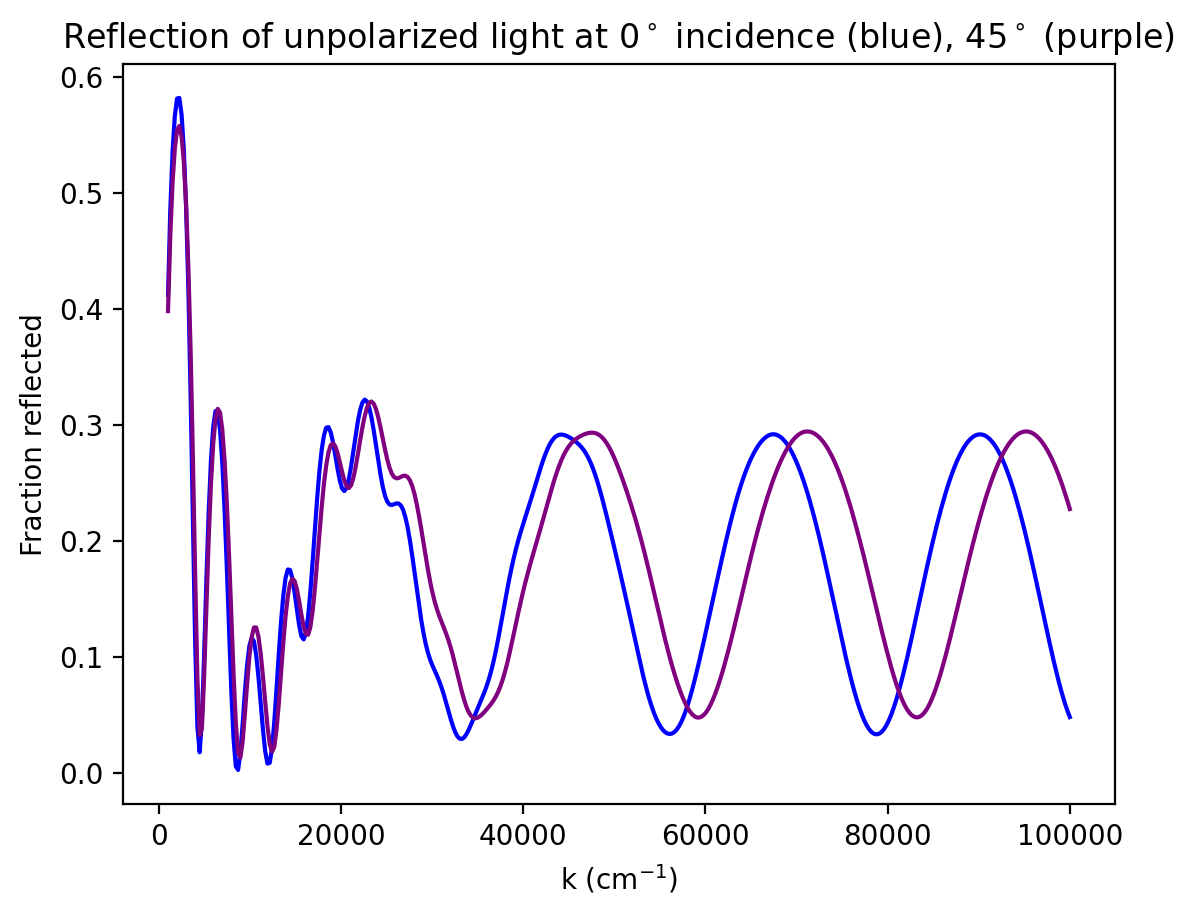

In [86]:
# list of layer thicknesses in nm
d_list = [inf,100,300,inf]
# list of refractive indices
n_list = [1,2.2,3.3+0.3j,1]
# list of wavenumbers to plot in nm^-1
ks=linspace(0.0001,.01,num=400)
# initialize lists of y-values to plot
Rnorm=[] 
R45=[]
for k in ks:
    # For normal incidence, s and p polarizations are identical.
    # I arbitrarily decided to use 's'.
    Rnorm.append(coh_tmm('s',n_list, d_list, 0, 1/k)['R'])
    R45.append(unpolarized_RT(n_list, d_list, 45*degree, 1/k)['R'])
kcm = ks * 1e7 #ks in cm^-1 rather than nm^-1
plt.figure()
plt.plot(kcm,Rnorm,'blue',kcm,R45,'purple')
plt.xlabel('k (cm$^{-1}$)')
plt.ylabel('Fraction reflected')
plt.title('Reflection of unpolarized light at 0$^\circ$ incidence (blue), '
            '45$^\circ$ (purple)');
plt.show()

In [87]:
tmm.absorp_in_each_layer(R45)

NameError: name 'tmm' is not defined

## Sample 2

Here's the transmitted intensity versus wavelength through a single-layer
film which has some complicated wavelength-dependent index of refraction.
(I made these numbers up, but in real life they could be read out of a
graph / table published in the literature.) Air is on both sides of the
film, and the light is normally incident.

In [97]:
#index of refraction of my material: wavelength in nm versus index.
material_nk_data = array([
                        [[200,2+.1j],
                         [1200, 2+.1j],
                        
                        ],
                          
                        
                        [[200, 2.1+0.1j],
                        [300, 2.4+0.3j],
                        [400, 2.3+0.4j],
                        [500, 2.2+0.4j],
                        [750, 2.2+0.5j],
                        [1300, 2.2+0.5j]]
                         ])
material_nk_fn = interp1d(material_nk_data[:,0].real,
                          material_nk_data[:,1], kind='quadratic')
d_list = [inf,10,30,inf] #in nm
lambda_list = linspace(200,1200,400) #in nm
A_list = []
for lambda_vac in lambda_list:
    n_list = [1, material_nk_fn(lambda_vac), 1]
    A_list.append(1-coh_tmm('s',n_list,d_list,0,lambda_vac)['T']-coh_tmm('s',n_list,d_list,0,lambda_vac)['R'])
plt.figure()
plt.plot(lambda_list,A_list)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Fraction of power Absorbed')
plt.title('Absotption at normal incidence');
plt.show()

IndexError: too many indices for array

# Sample 4

Here is an example where we plot absorption and Poynting vector
as a function of depth.

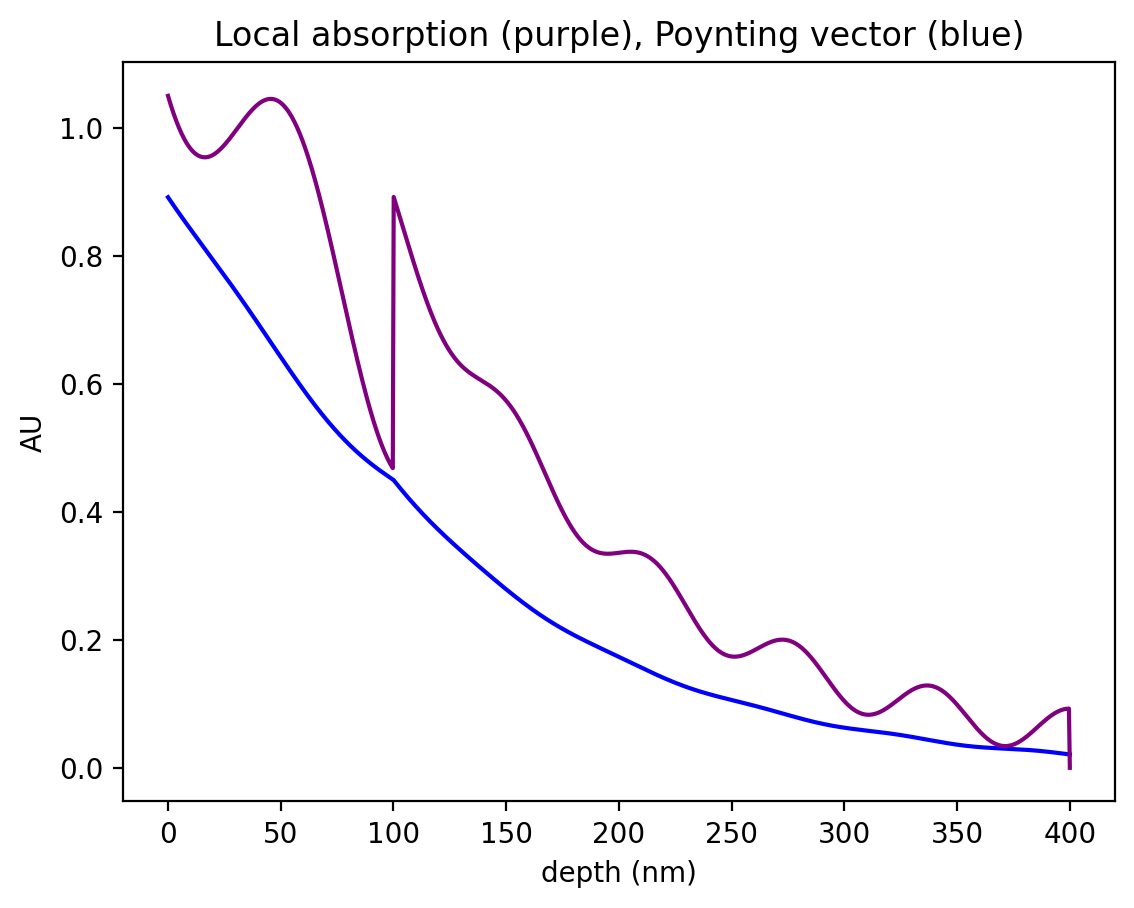

In [76]:
d_list = [inf, 100, 300, inf] #in nm
n_list = [1, 2.2+0.2j, 3.3+0.3j, 1]
th_0=pi/4
lam_vac=400
pol='p'
coh_tmm_data = coh_tmm(pol,n_list,d_list,th_0,lam_vac)

ds = linspace(0,400,num=1000) #position in structure
poyn=[]
absor=[]
for d in ds:
    layer, d_in_layer = find_in_structure_with_inf(d_list,d)
    data=position_resolved(layer,d_in_layer,coh_tmm_data)
    poyn.append(data['poyn'])
    absor.append(data['absor'])
# convert data to numpy arrays for easy scaling in the plot
poyn = array(poyn)
absor = array(absor)
plt.figure()
plt.plot(ds,poyn,'blue',ds,200*absor,'purple')
plt.xlabel('depth (nm)')
plt.ylabel('AU')
plt.title('Local absorption (purple), Poynting vector (blue)');
plt.show()

# Sample 5

Color calculations: What color is a air / thin SiO2 / Si wafer?

# Sample 6

An example reflection plot with a surface plasmon resonance (SPR) dip. Compare with http://doi.org/10.2320/matertrans.M2010003 ("Spectral and Angular Responses of Surface Plasmon Resonance Based on the Kretschmann Prism Configuration") Fig 6a

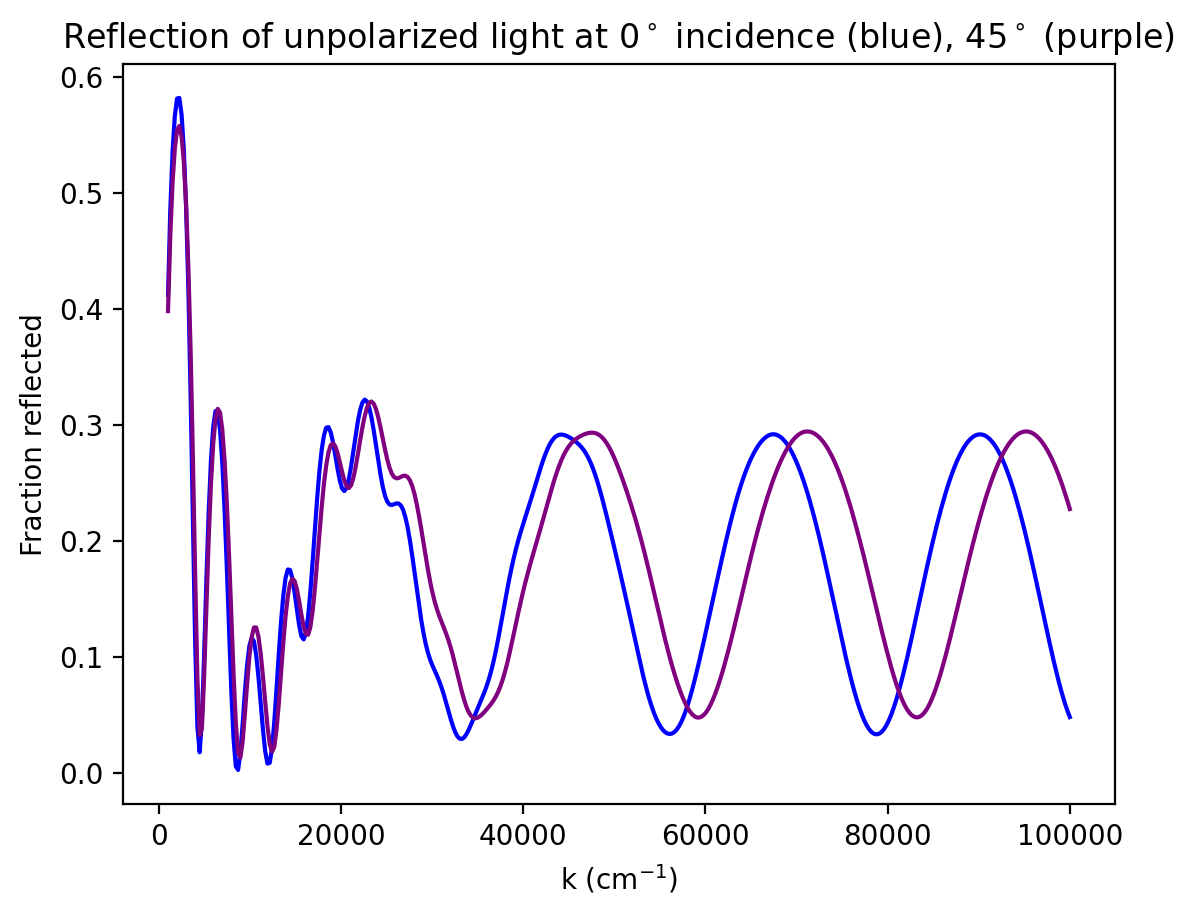

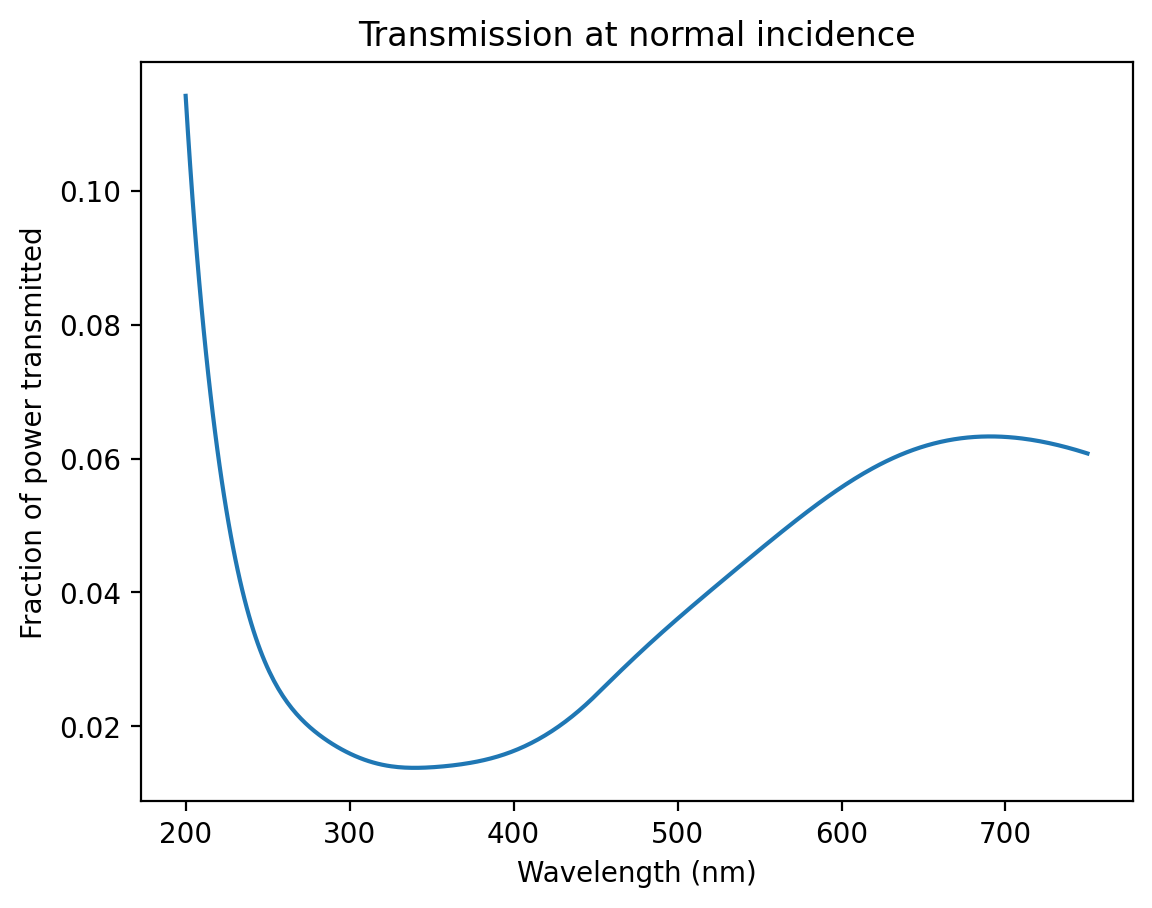

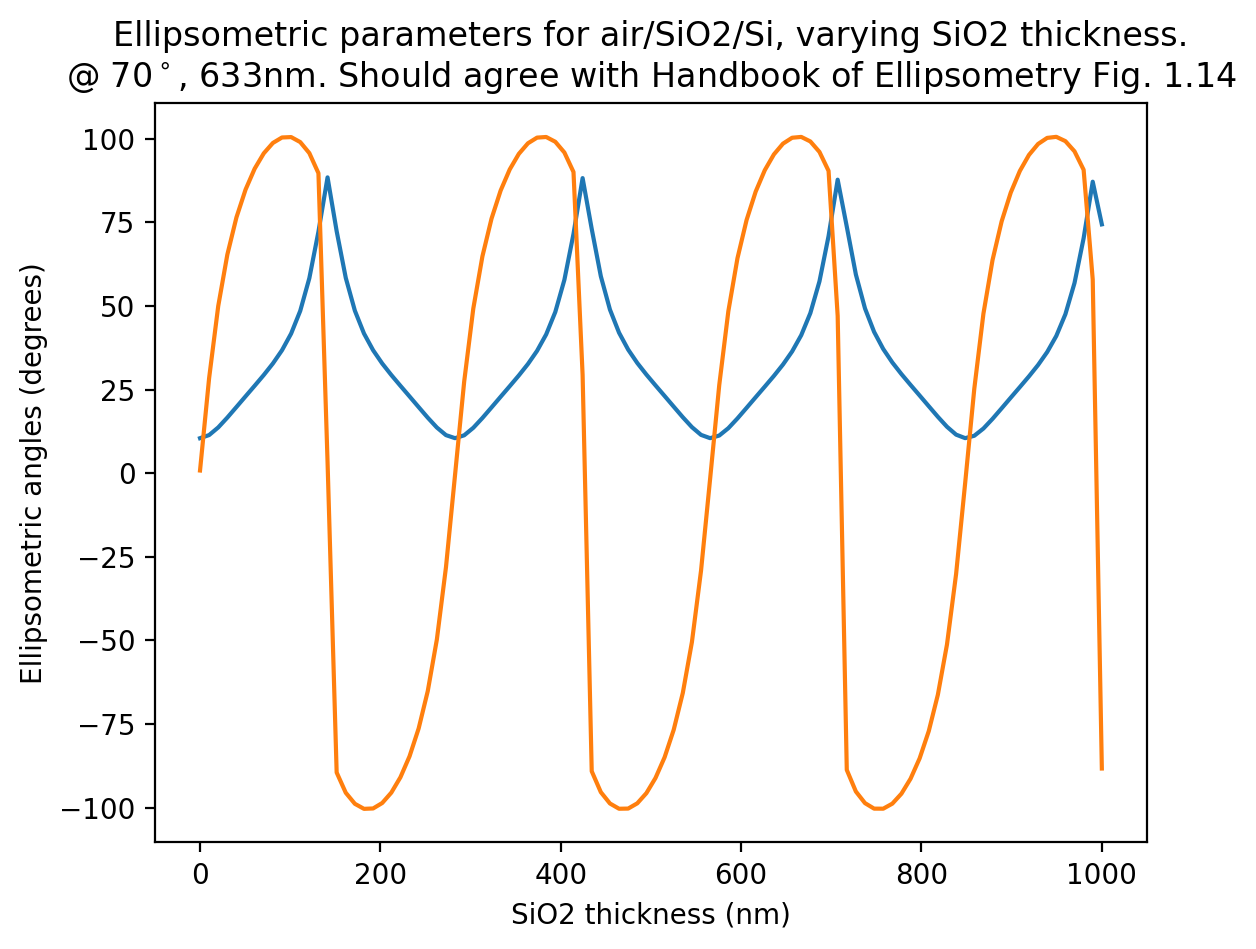

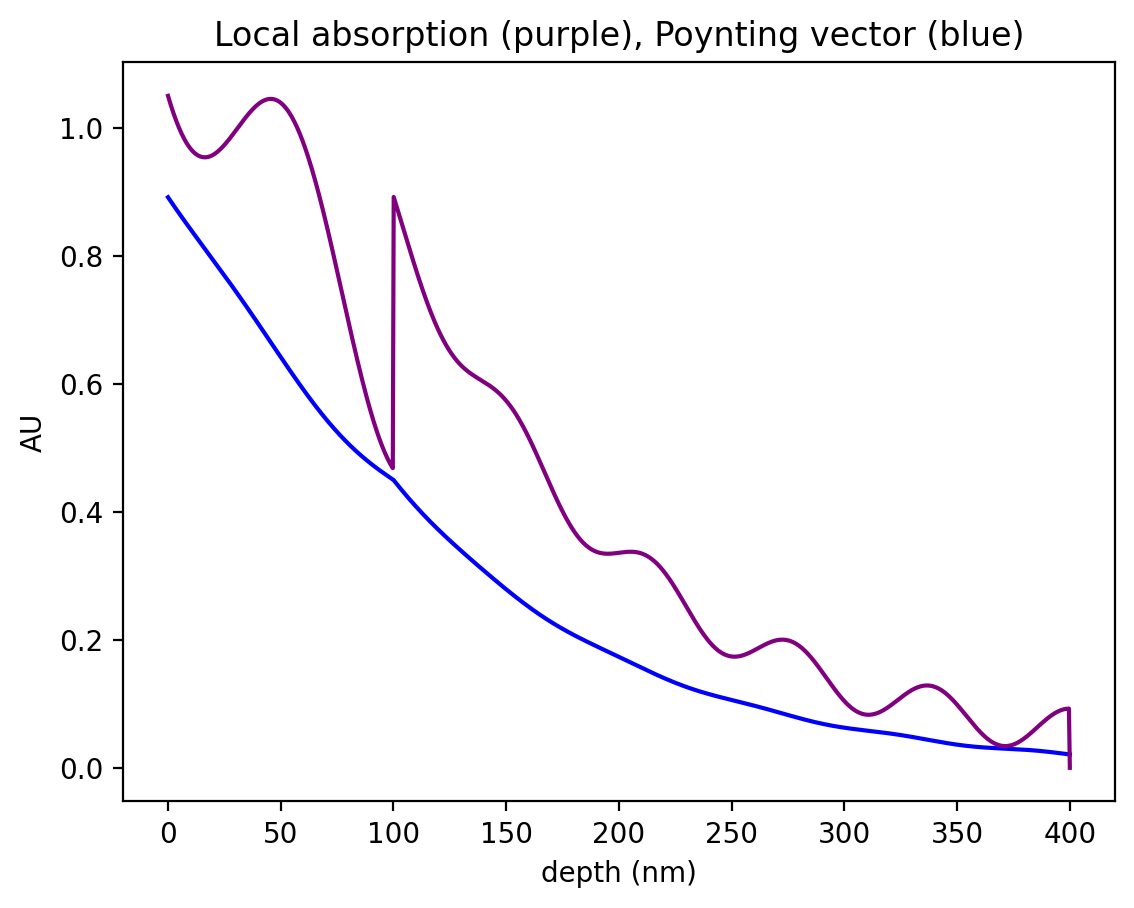

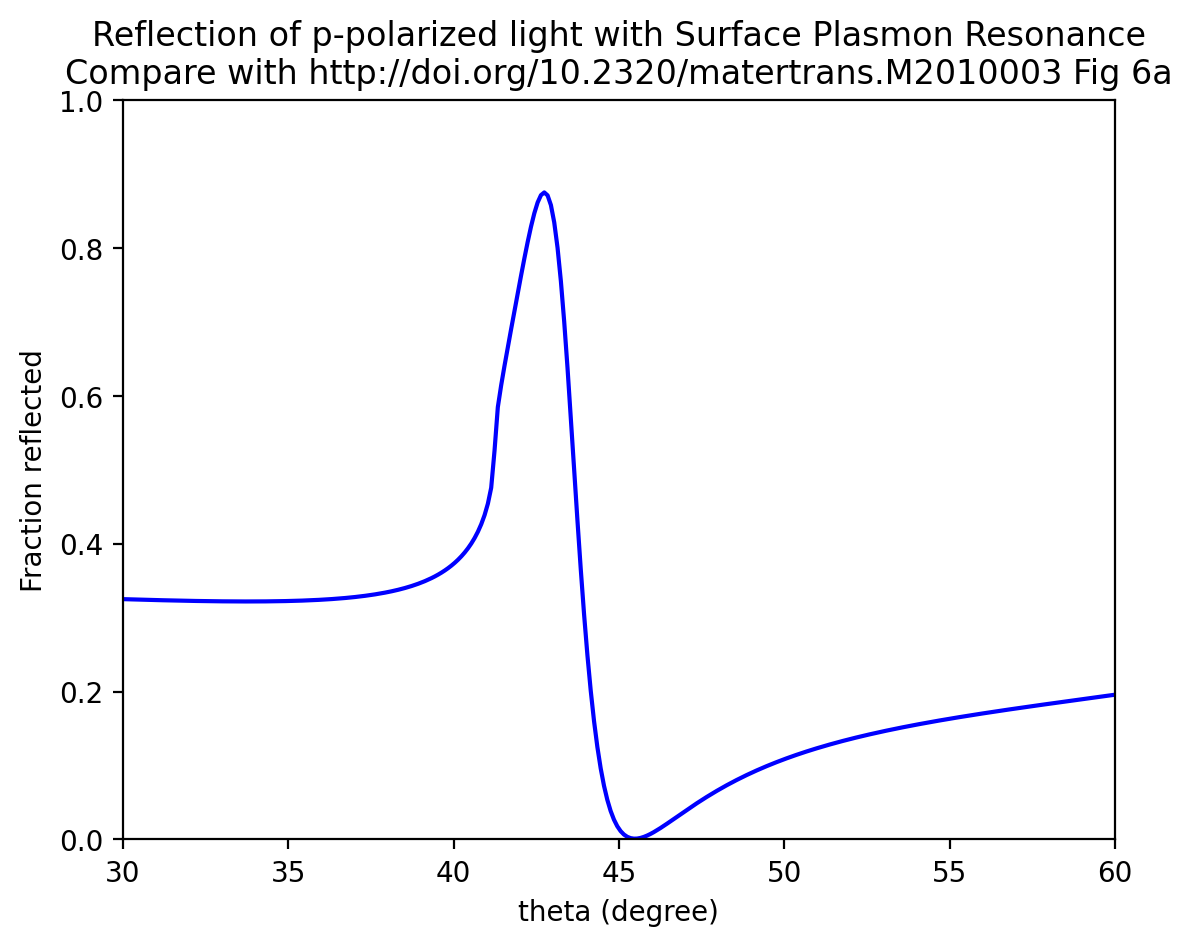

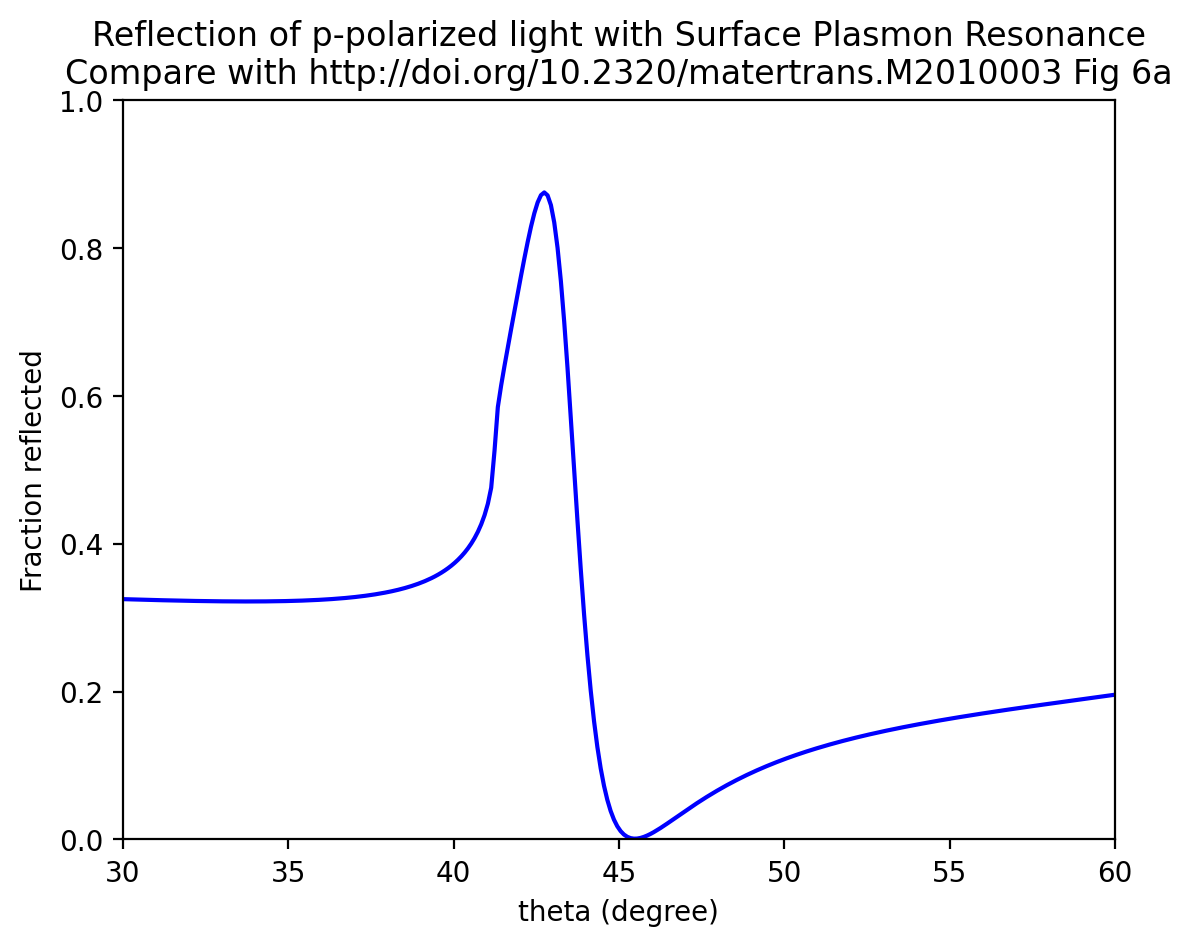

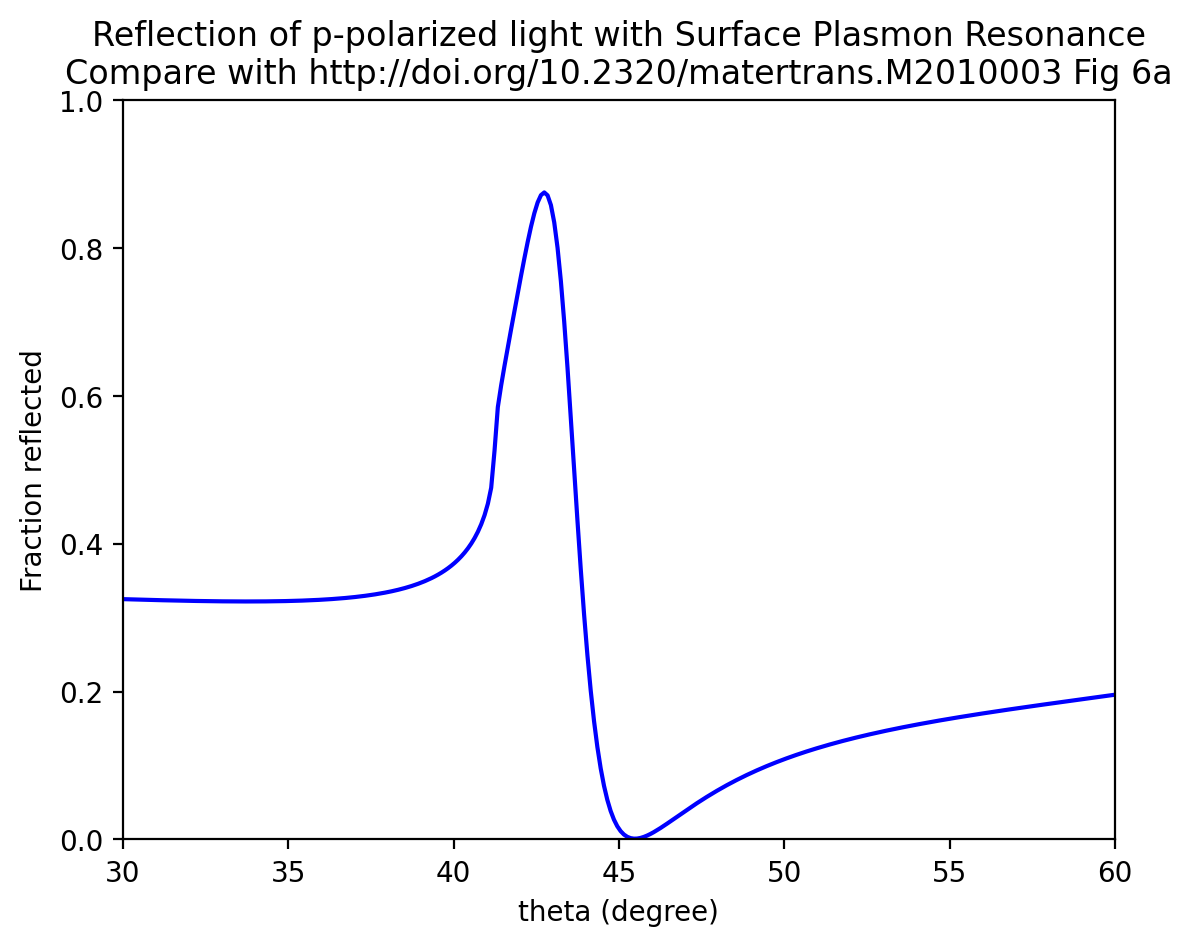

In [12]:
# list of layer thicknesses in nm
d_list = [inf, 5, 30, inf]
# list of refractive indices
n_list = [1.517, 3.719+4.362j, 0.130+3.162j, 1]
# wavelength in nm
lam_vac = 633
# list of angles to plot
theta_list = linspace(30*degree, 60*degree, num=300)
# initialize lists of y-values to plot
Rp = []
for theta in theta_list:
    Rp.append(coh_tmm('p', n_list, d_list, theta, lam_vac)['R'])
plt.figure()
plt.plot(theta_list/degree, Rp, 'blue')
plt.xlabel('theta (degree)')
plt.ylabel('Fraction reflected')
plt.xlim(30, 60)
plt.ylim(0, 1)
plt.title('Reflection of p-polarized light with Surface Plasmon Resonance\n'
          'Compare with http://doi.org/10.2320/matertrans.M2010003 Fig 6a');
plt.show()